In [20]:
import csv

import numpy as np
import tensorflow as tf
from sklearn import model_selection
import os

In [21]:
RANDOM_SEED = 42
NUM_CLASSES = 26
dataset = 'keypoint_classifier/keypoint_key_letters_right.csv'
model_save_path = 'keypoint_classifier/New_Dataset_GRU_model_right.hdf5'

In [22]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [4]:

X_train = X_train[:, None, :]
print(X_train.shape)

(186, 1, 42)


In [5]:
X_test = X_test[:, None, :]
print(X_test.shape)

(63, 1, 42)


In [6]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from keras.layers import GRU
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(1,2*21)))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(NUM_CLASSES, activation = "softmax"))

In [7]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

# model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# callback for early abort
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

 # model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 50)             18600     
                                                                 
 dropout (Dropout)           (None, 1, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               60400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 26)                2626      
                                                                 
Total params: 81,626
Trainable params: 81,626
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(
    X_train,
    y_train,
    epochs=500,
    batch_size=128,
    validation_data=(X_test, y_test),
)

Epoch 1/500
2/2 [==============================] - 3s 506ms/step - loss: 3.2595 - accuracy: 0.0323 - val_loss: 3.2578 - val_accuracy: 0.0159
Epoch 2/500
2/2 [==============================] - 0s 27ms/step - loss: 3.2550 - accuracy: 0.0591 - val_loss: 3.2580 - val_accuracy: 0.0159
Epoch 3/500
2/2 [==============================] - 0s 29ms/step - loss: 3.2528 - accuracy: 0.0860 - val_loss: 3.2583 - val_accuracy: 0.0317
Epoch 4/500
2/2 [==============================] - 0s 28ms/step - loss: 3.2498 - accuracy: 0.0860 - val_loss: 3.2585 - val_accuracy: 0.0317
Epoch 5/500
2/2 [==============================] - 0s 29ms/step - loss: 3.2473 - accuracy: 0.0860 - val_loss: 3.2587 - val_accuracy: 0.0317
Epoch 6/500
2/2 [==============================] - 0s 30ms/step - loss: 3.2449 - accuracy: 0.0968 - val_loss: 3.2588 - val_accuracy: 0.0317
Epoch 7/500
2/2 [==============================] - 0s 29ms/step - loss: 3.2417 - accuracy: 0.1183 - val_loss: 3.2588 - val_accuracy: 0.0317
Epoch 8/500
2/2 [==

In [9]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [23]:
model = Sequential()
model.add(Dense(256, input_shape=(42,), activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(NUM_CLASSES, activation="softmax"))

model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

# model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# callback for early abort
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

 # model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               11008     
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 26)                3354      
                                                                 
Total params: 47,258
Trainable params: 47,258
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(
    X_train,
    y_train,
    epochs=500,
    batch_size=128,
    validation_split=0.2
)
# here validation data should be part of X_train, and then check it on X_test
# values should concern on a test set



Epoch 1/500
2/2 [==============================] - 1s 120ms/step - loss: 3.3137 - accuracy: 0.0270 - val_loss: 3.2461 - val_accuracy: 0.1053
Epoch 2/500
2/2 [==============================] - 0s 24ms/step - loss: 3.2290 - accuracy: 0.0541 - val_loss: 3.2143 - val_accuracy: 0.1316
Epoch 3/500
2/2 [==============================] - 0s 24ms/step - loss: 3.1705 - accuracy: 0.0676 - val_loss: 3.1896 - val_accuracy: 0.1053
Epoch 4/500
2/2 [==============================] - 0s 24ms/step - loss: 3.1221 - accuracy: 0.1419 - val_loss: 3.1656 - val_accuracy: 0.1053
Epoch 5/500
2/2 [==============================] - 0s 24ms/step - loss: 3.0805 - accuracy: 0.1419 - val_loss: 3.1460 - val_accuracy: 0.1053
Epoch 6/500
2/2 [==============================] - 0s 24ms/step - loss: 3.0444 - accuracy: 0.1284 - val_loss: 3.1278 - val_accuracy: 0.0789
Epoch 7/500
2/2 [==============================] - 0s 24ms/step - loss: 3.0071 - accuracy: 0.1351 - val_loss: 3.1034 - val_accuracy: 0.1316
Epoch 8/500
2/2 [==

2/2 [==============================] - 0s 0s/step


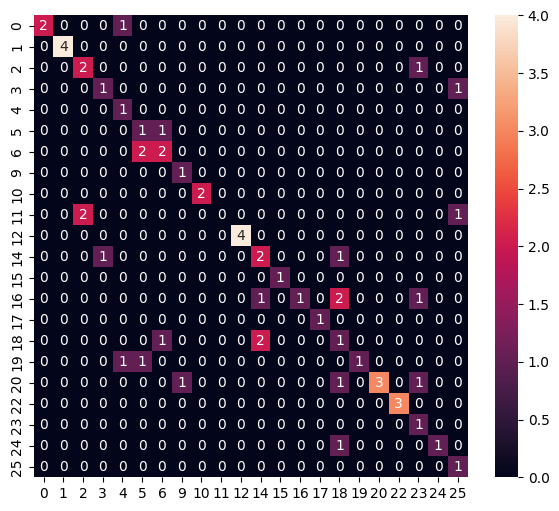

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00         4
           2       0.50      0.67      0.57         3
           3       0.50      0.50      0.50         2
           4       0.33      1.00      0.50         1
           5       0.25      0.50      0.33         2
           6       0.50      0.50      0.50         4
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.50      0.50      0.50         2
          10       1.00      1.00      1.00         2
          11       0.00      0.00      0.00         3
          12       1.00      1.00      1.00         4
          14       0.40      0.50      0.44         4
          15       1.00      1.00      1.00         1
          16       1.00      0.20      0.33         5
          17       1.00      0.50      0.67         2
     

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg

In [25]:
# callback needs to be done better, but still accuracy 86%
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [ ]:
# metrics precision etc


In [14]:

X_train = X_train[:, None, :]
print(X_train.shape)

(186, 1, 42)


In [15]:
X_test = X_test[:, None, :]
print(X_test.shape)

(63, 1, 42)


In [16]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from keras.layers import GRU, SimpleRNN
model = Sequential()
model.add(SimpleRNN(50, return_sequences=True, input_shape=(1,2*21)))
model.add(Dropout(0.2))
model.add(SimpleRNN(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(NUM_CLASSES, activation = "softmax"))

In [17]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

# model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# callback for early abort
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

 # model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1, 50)             4650      
                                                                 
 dropout_2 (Dropout)         (None, 1, 50)             0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 100)               15100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 26)                2626      
                                                                 
Total params: 22,376
Trainable params: 22,376
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(
    X_train,
    y_train,
    epochs=500,
    batch_size=128,
    validation_data=(X_test, y_test)
)

Epoch 1/500
2/2 [==============================] - 1s 206ms/step - loss: 3.3345 - accuracy: 0.0269 - val_loss: 3.3391 - val_accuracy: 0.0159
Epoch 2/500
2/2 [==============================] - 0s 26ms/step - loss: 3.2509 - accuracy: 0.0484 - val_loss: 3.3206 - val_accuracy: 0.0000e+00
Epoch 3/500
2/2 [==============================] - 0s 24ms/step - loss: 3.2299 - accuracy: 0.0806 - val_loss: 3.3059 - val_accuracy: 0.0000e+00
Epoch 4/500
2/2 [==============================] - 0s 35ms/step - loss: 3.2176 - accuracy: 0.0699 - val_loss: 3.2941 - val_accuracy: 0.0000e+00
Epoch 5/500
2/2 [==============================] - 0s 27ms/step - loss: 3.1200 - accuracy: 0.0860 - val_loss: 3.2827 - val_accuracy: 0.0000e+00
Epoch 6/500
2/2 [==============================] - 0s 57ms/step - loss: 3.1144 - accuracy: 0.0968 - val_loss: 3.2701 - val_accuracy: 0.0159
Epoch 7/500
2/2 [==============================] - 0s 29ms/step - loss: 3.1293 - accuracy: 0.0753 - val_loss: 3.2570 - val_accuracy: 0.0159
Epo

2/2 [==============================] - 0s 2ms/step


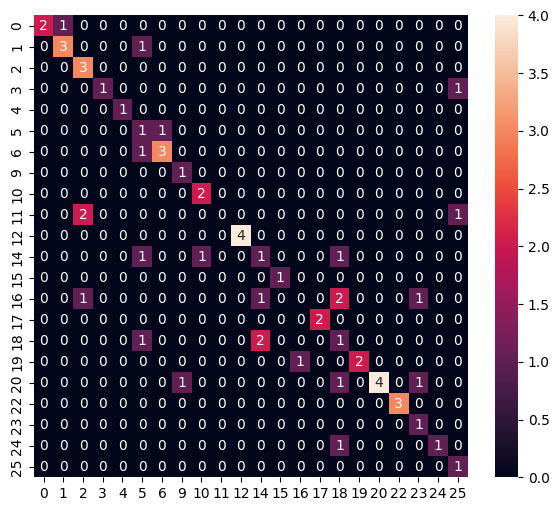

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      0.75      0.75         4
           2       0.50      1.00      0.67         3
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         1
           5       0.20      0.50      0.29         2
           6       0.75      0.75      0.75         4
           8       0.00      0.00      0.00         0
           9       0.50      0.50      0.50         2
          10       0.67      1.00      0.80         2
          11       0.00      0.00      0.00         3
          12       1.00      1.00      1.00         4
          14       0.25      0.25      0.25         4
          15       1.00      1.00      1.00         1
          16       0.00      0.00      0.00         5
          17       1.00      1.00      1.00         2
          18       0.17      0.25      0.20         4
     

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg

In [19]:
# callback needs to be done better, but still accuracy 86%
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)